# **Movie Analysis Project**

## **Business Understanding**

### Business Problem
The company has decided to enter into the movie production industry by creating a new movie studio. However, the stakeholders lack the knowledge on which types of films perform well in the box office industry. Without understanding films that are currently performing best commercially, the studio risks investing heavily in movies that fail to attract audiences or generate revenue.


### Objectives
- To determine the relationship between the production budget and the profitability
- To determine the impact of ratings and vote counts on the gross revenue
- To explore trends in movie performance over the years
- To examine the performance of existing studios
- To assess the combined effect of vote count, rating, and budget on worldwide revenue.

## **Data Understanding**

The datasets used in this analysis were sourced from the https://github.com/learn-co-curriculum/dsc-phase-2-project-v3.git repository. To simplify data management, we created a new SQLite database named movie_data.db and we stored it in the Data folder. This dataset consolidated only the relevant tables required for the analysis.

## **Data Preparation**
In this section we performed some basic data inspection to check our dataset. Some of the tasks we performed were things like importing libraries and checking out all the tables.

### Importing Libraries

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import sqlite3
from matplotlib import pyplot as plt
%matplotlib inline

# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [122]:
conn = sqlite3.connect('Data/movies_Data.db')

pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,bom_movie_gross
1,movie_basics
2,movie_ratings
3,tn_movie_budgets


## Previewing our Datasets 

In [123]:
movie_gross = pd.read_sql_query("""SELECT * FROM bom_movie_gross;""",conn)
movie_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [124]:

movie_basics = pd.read_sql_query("""SELECT * FROM movie_basics;""",conn)
movie_basics.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [125]:
movie_rating = pd.read_sql_query("""SELECT * FROM movie_ratings;""",conn)
movie_rating.head(10)


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [126]:

movie_budget = pd.read_sql_query("""SELECT * FROM tn_movie_budgets;""",conn)
movie_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


### Checking our Data (.info and .describe)

In [127]:
def sql_table_info(conn, table_names):
    for table in table_names:
        df = pd.read_sql(f"SELECT * FROM {table};", conn)
        print(f"\n Info for table '{table}':")
        print("-" * 60)
        df.info()
        print()
table_names = ["bom_movie_gross", "movie_basics", "movie_ratings", "tn_movie_budgets"]
sql_table_info(conn, table_names)


 Info for table 'bom_movie_gross':
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


 Info for table 'movie_basics':
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146

In [128]:
def sql_table_describe(conn, table_names):
    
    for table in table_names:
        # Read the table into a DataFrame
        df = pd.read_sql(f"SELECT * FROM {table};", conn)
        
        print(f"\n Descriptive statistics for table '{table}':")
        print("-" * 60)
        display(df.describe(include='all').T)
table_names = ["bom_movie_gross", "movie_basics", "movie_ratings", "tn_movie_budgets"]
sql_table_describe(conn, table_names)


 Descriptive statistics for table 'bom_movie_gross':
------------------------------------------------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,3387,3386,Bluebeard,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studio,3382,257,IFC,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
domestic_gross,3359.0,NaN,NaN,NaN,28745845.066984,66982498.237365,100.0,120000.0,1400000.0,27900000.0,936700000.0
foreign_gross,2037,1204,1200000,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,3387.0,NaN,NaN,NaN,2013.958075,2.478141,2010.0,2012.0,2014.0,2016.0,2018.0



 Descriptive statistics for table 'movie_basics':
------------------------------------------------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
movie_id,146144,146144,tt9914662,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primary_title,146144,136071,Home,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_title,146123,137773,Broken,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_year,146144.0,NaN,NaN,NaN,2014.621798,2.733583,2010.0,2012.0,2015.0,2017.0,2115.0
runtime_minutes,114405.0,NaN,NaN,NaN,86.187247,166.36059,1.0,70.0,87.0,99.0,51420.0
genres,140736,1085,Documentary,32185,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Descriptive statistics for table 'movie_ratings':
------------------------------------------------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
movie_id,73856,73856,tt9633108,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
averagerating,73856.0,NaN,NaN,NaN,6.332729,1.474978,1.0,5.5,6.5,7.4,10.0
numvotes,73856.0,NaN,NaN,NaN,3523.662167,30294.022971,5.0,14.0,49.0,282.0,1841066.0



 Descriptive statistics for table 'tn_movie_budgets':
------------------------------------------------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5782.0,NaN,NaN,NaN,50.372363,28.821076,1.0,25.0,50.0,75.0,100.0
release_date,5782,2418,"Dec 31, 2014",24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
movie,5782,5698,King Kong,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production_budget,5782,509,"$20,000,000",231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
domestic_gross,5782,5164,$0,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
worldwide_gross,5782,5356,$0,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
#Inspect columns to find out which keys will be used during the merge
def table_columns(conn, table_names):
    
    table_info = {}
    for table in table_names:
        df = pd.read_sql(f"SELECT * FROM {table} LIMIT 5;", conn)
        cols = df.columns.tolist()
        table_info[table] = cols
        print(f"\n {table} columns:")
        print(cols)
    
    return table_info    
table = ["bom_movie_gross", "movie_basics", "movie_ratings", "tn_movie_budgets"]
columns = table_columns(conn, table)



 bom_movie_gross columns:
['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

 movie_basics columns:
['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']

 movie_ratings columns:
['movie_id', 'averagerating', 'numvotes']

 tn_movie_budgets columns:
['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']


## **Data cleaning**

In this section we performed the following tasks: Inspecting missing values and handling them, checking duplicates, veryfying data types and filtering the data 

### Verifying Data types

we converted the numeric columns which where saved as string types to floats.

In [130]:
def clean_currency_columns(df, columns):
    """
    Cleans commas and dollar signs from currency columns 
    and converts them to numeric.
    """
    for col in columns:
        if col in df.columns:
            df[col] = df[col].astype(str)
            df[col] = df[col].str.replace(',', '', regex=False)
            df[col] = df[col].str.replace('$', '', regex=False)
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"Cleaned and converted '{col}' to numeric.")
        else:
            print(f"Column '{col}' not found.")
    return df
movie_gross = clean_currency_columns(movie_gross, ['foreign_gross'])
movie_budget = clean_currency_columns(movie_budget, ['production_budget', 'domestic_gross', 'worldwide_gross'])


Cleaned and converted 'foreign_gross' to numeric.
Cleaned and converted 'production_budget' to numeric.
Cleaned and converted 'domestic_gross' to numeric.
Cleaned and converted 'worldwide_gross' to numeric.


### Checking for duplicates

In [131]:
print(movie_budget.duplicated().sum())
print(movie_basics.duplicated().sum())
print(movie_gross.duplicated().sum())
print(movie_rating.duplicated().sum())

0
0
0
0


### Checking for missing values

In [132]:
print(movie_budget.isnull().sum())
print(movie_basics.isnull().sum())
print(movie_gross.isnull().sum())
print(movie_rating.isnull().sum())

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
movie_id         0
averagerating    0
numvotes         0
dtype: int64


### Handling missing values

In [133]:

# Handle missing value in original_title column in movie_basics by dropping the row
movie_basics.dropna(subset=['original_title', 'runtime_minutes'], inplace=True)

# Impute missing values
# For categorical/object columns, impute with a placeholder 'Unknown'
movie_gross['studio'].fillna('Unknown', inplace=True)
movie_basics['genres'].fillna('Unknown', inplace=True)

# For numerical columns, impute with the median
movie_gross['domestic_gross'].fillna(movie_gross['domestic_gross'].median(), inplace=True)
movie_gross['foreign_gross'].fillna(movie_gross['foreign_gross'].median(), inplace=True)

# Verify that missing values have been handled
print("Missing values after handling in gross_copy:")
print(movie_gross.isnull().sum())
print("\nMissing values after handling in basics_copy:")
print(movie_basics.isnull().sum())

Missing values after handling in gross_copy:
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Missing values after handling in basics_copy:
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


## **Feature Engineering**

In this section we merged the tables and formed one table named final_merged

###  Merging datasets

We merged movie_basics and movie_ratings using the primary key movie_id

In [134]:
query = """
SELECT * 
FROM 
    movie_basics AS mb
JOIN 
    movie_ratings AS mr
USING (movie_id)    
;
"""
merged_movie_ratings = pd.read_sql_query(query, conn)
merged_movie_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


Added a new column named total_gross on movie_budget table

In [135]:
movie_budget['total_gross'] = movie_budget['domestic_gross'] + movie_budget['worldwide_gross']

movie_budget['profit'] = movie_budget['total_gross'] - movie_budget['production_budget']

movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


We also added a new column in movie_gross and also named it total_gross

In [136]:
# Let us create a new column in the merged dataset called total_gross
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']

display(movie_gross.head())

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


we merged movie_gross table to the merged_movie_ratings using an inner join.

In [137]:
merged_rg = pd.merge(
    merged_movie_ratings,
    movie_gross,
    left_on=['primary_title', 'start_year'],
    right_on=['title', 'year'],
    how='inner'
)

merged_rg.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,18700000.0,2016,19800000.0
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,188100000.0
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014,53200000.0
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,1019.4,2015,652301019.4


we finally merged movie_budget to the merged_rg table above using an inner join

In [138]:
final_merged = pd.merge(
    merged_rg,
    movie_budget[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross']],
    left_on='primary_title',
    right_on='movie',
    how='inner'
)
final_merged.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_x,foreign_gross,year,total_gross,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0,On the Road,25000000,720828,9313302
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,188100000.0,The Secret Life of Walter Mitty,91000000,58236838,187861183
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014,53200000.0,A Walk Among the Tombstones,28000000,26017685,62108587
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,1019.4,2015,652301019.4,Jurassic World,215000000,652270625,1648854864
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,The Rum Diary,FD,13100000.0,10800000.0,2011,23900000.0,The Rum Diary,45000000,13109815,21544732


In [139]:
final_merged.duplicated().sum()

np.int64(0)

# **EDA (Exploratory Data Analysis)**

## 1. Univariate Analysis

In this section we focused on exploring the characteristics and distribution of individual variables in the dataset. This helped in understanding the overall structure of the data and detect possible outliers.


### a). Distribution of average rating.

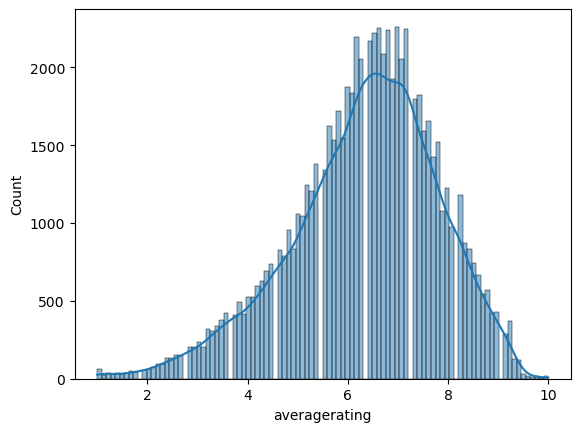

In [140]:
sns.histplot(movie_rating['averagerating'], kde=True)
plt.show()

From this histogram, we can see the distribution of the average ratings is roughly normal (left-skewed), with most movies scoring between 5.0 and 7.5. This suggests that audiences tend to give moderately to slightly positive ratings with few extreme scores.


### b). Distribution of movies produced per year (2010 - 2018)

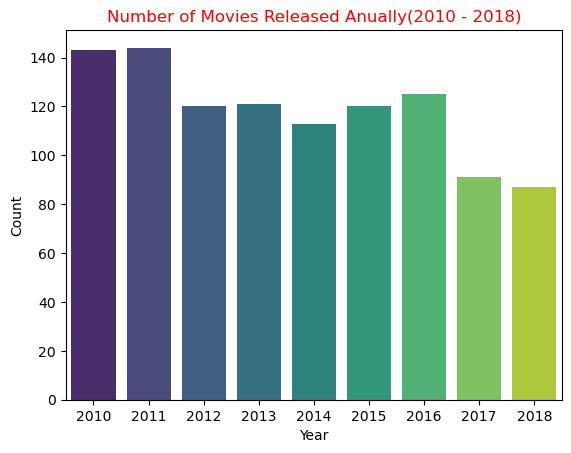

In [141]:
sns.countplot (x='year', data=final_merged, palette='viridis')

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of Movies Released Anually(2010 - 2018)", color='red')
plt.show()

From the plot above we see that the number of movies produced fluctuated slightly between 2010 and 2018, peaking around 2015 and 2016. After 2016, there is a noticeable decline in movie counts, indicating a slowdown in production toward 2018.

### c). Distribution of prevalent genres

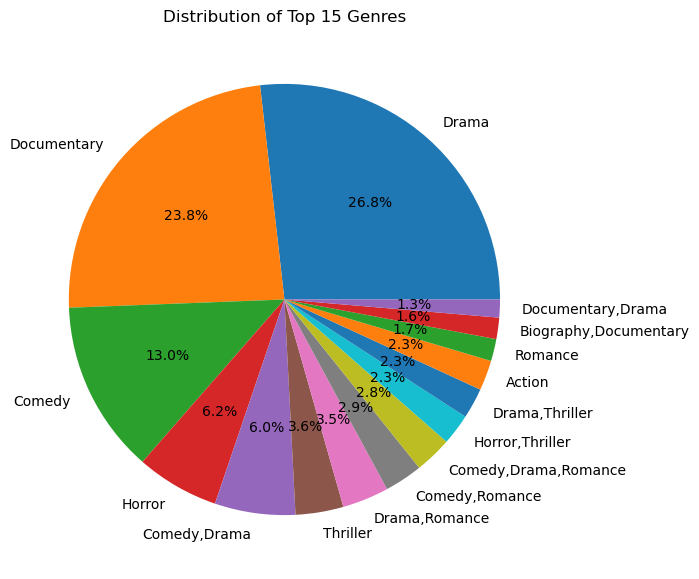

In [142]:
genre_counts = merged_movie_ratings["genres"].value_counts()
top_n_genres = 15
genre_counts.head(top_n_genres).plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title(f'Distribution of Top {top_n_genres} Genres')
plt.ylabel('') # Remove the default 'genres' label on the y-axis
plt.show()

Based on this piechart, we can see that drama, comedy and action movies are the most prevalent genres in this dataset.
However, to make these findings actionable for the company,
we'd need to investigate if the prevalence of a genre correlates with its success.
To do this we need to perform bivariate and multivariate analysis

## 2. Bivariate Analysis

### a). Analyzing the Relationship between Production Budget and Profitability

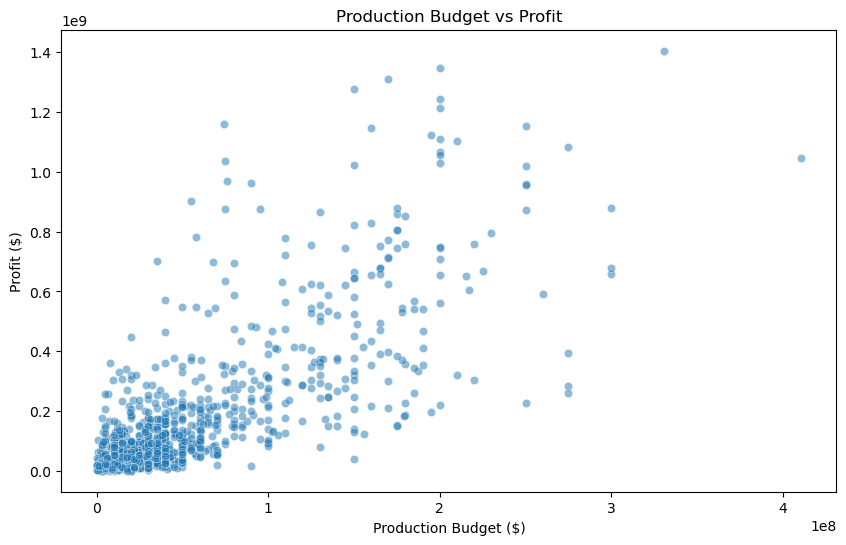

In [143]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data= final_merged,
    x="production_budget", 
    y="total_gross",
    alpha=0.5  
)

plt.title("Production Budget vs Profit")
plt.xlabel("Production Budget ($)")
plt.ylabel("Profit ($)")
plt.show()

The plot shows a positive correlation between production budget and profit, indicating that movies with high budgets generally tend to earn higher profits. However, the spread of the data point suggests variability, meaning not all high-budget films guarantee high profits.

### b). Analyzing the Relationship between Average Rating and Total Gross

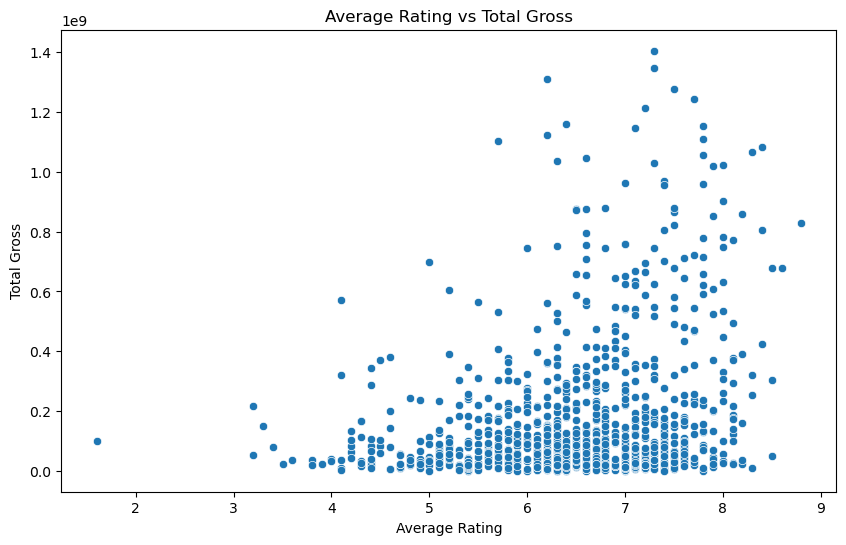

In [144]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='averagerating' ,y='total_gross', data= final_merged)
plt.title('Average Rating vs Total Gross')
plt.xlabel('Average Rating')
plt.ylabel('Total Gross')
plt.show()

The plot shows that there is a slight positive relationship between the two variables (weak positive correlation) - as the average rating increases, the total gross tends to be higher overallY but the relationship is not so strong. 

### c). Examining the top 10 best performing studios

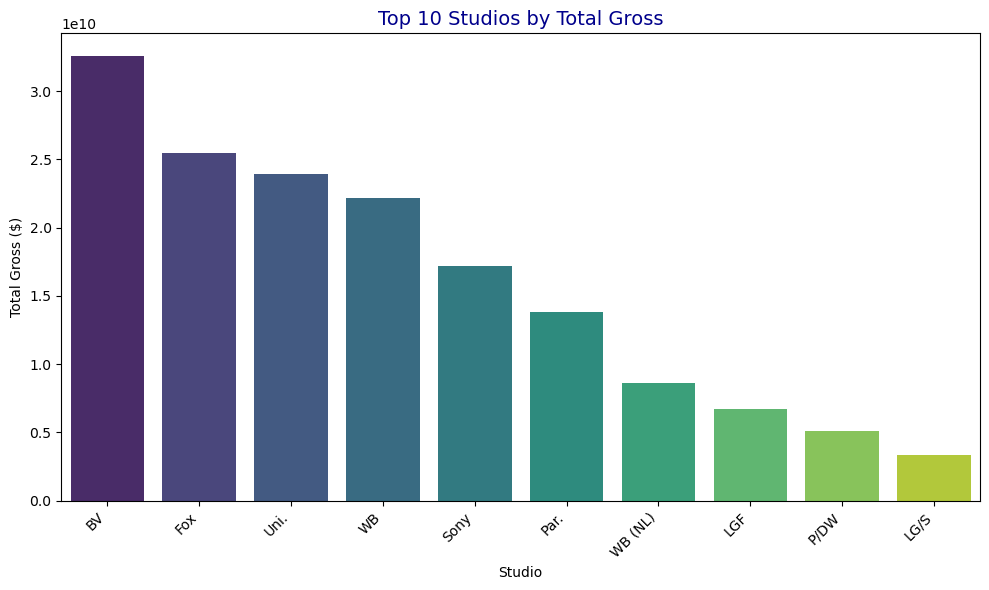

In [145]:
# Group by studio and calculate total gross
top_studios = (final_merged.groupby('studio', as_index=False)['total_gross'].sum().sort_values(by='total_gross', ascending=False).head(10))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_studios,
    x='studio',
    y='total_gross',
    palette='viridis'
)
plt.title("Top 10 Studios by Total Gross", fontsize=14, color='darkblue')
plt.xlabel("Studio")
plt.ylabel("Total Gross ($)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The chart shows that Disney (BV) leads the film industry in total gross revenue, followed by Fox, Universal (Uni) and Warner Bros (WB). The chart also shows a steep decline from BV TO LG/S, suggesting that a few major studios dominate the box office while smaller ones contribute much less.

### d). Examining the Top 10 Highest-Grossing Genres.

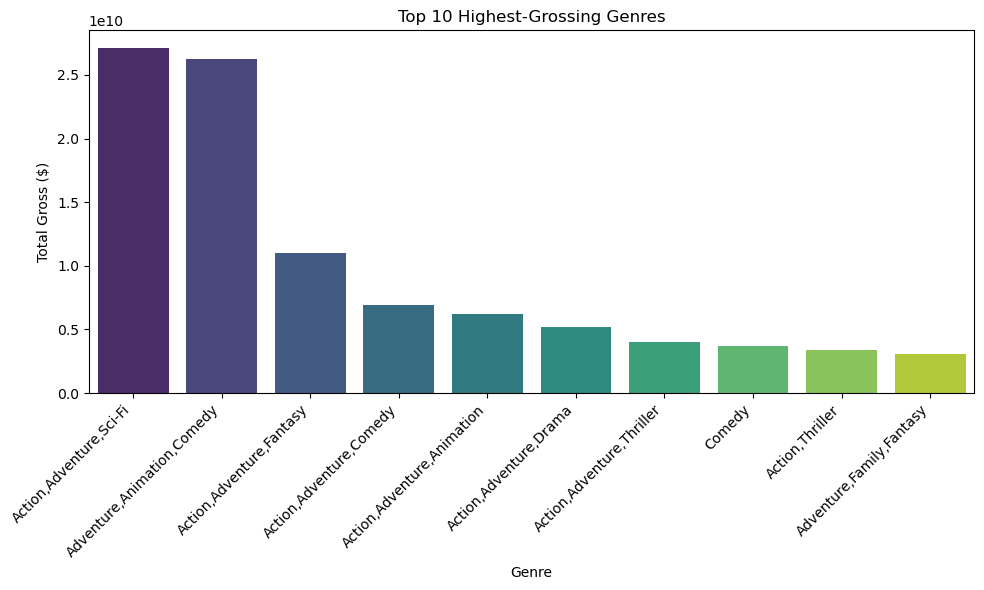

In [146]:
genre_gross = final_merged.groupby('genres', as_index=False)['total_gross'].sum().sort_values(by='total_gross', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=genre_gross,
    x='genres',
    y='total_gross',
    palette='viridis'
)
plt.title('Top 10 Highest-Grossing Genres')
plt.xlabel('Genre')
plt.ylabel('Total Gross ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This plot shows that the movie profitable genres tend to combine action, adventure with other enganging elements like sci-fi, fantasy, comedy or animation. These genres attract the widest audiences and deliver the highest returns suggesting that films blending excitement, imagination and humor have the strongest commercial appeal.

## 3. Multivariate Analysis

### Evaluating the effect of Average rating, Vote count and Production budget on worldwide revenue

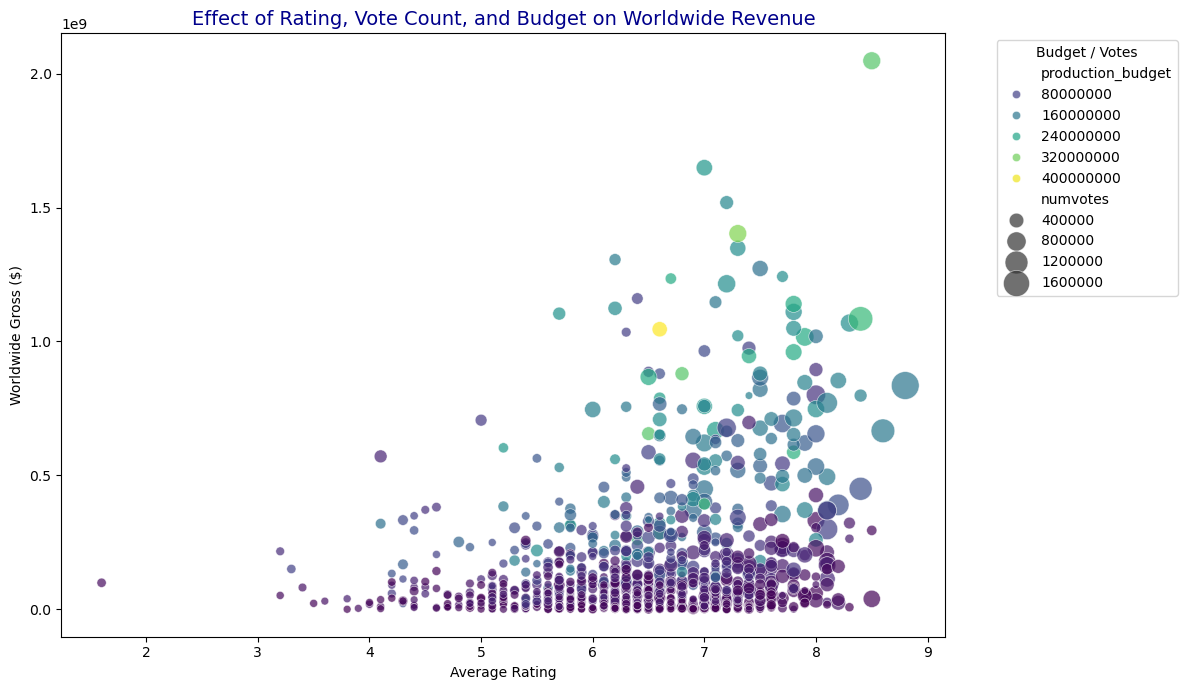

In [ ]:
plt.figure(figsize=(12,7))

sns.scatterplot(
    data=final_merged,
    x='averagerating',          
    y='worldwide_gross',       
    size='numvotes',           
    hue='production_budget',    
    sizes=(30, 400),
    alpha=0.7,
    palette='viridis'
)

plt.title('Effect of Rating, Vote Count, and Budget on Worldwide Revenue', fontsize=14, color='darkblue')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Gross ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Budget / Votes')
plt.tight_layout()
plt.show()

This chart shows that there is a general positive correlation between worldwide revenue and average ratings. Worldwide revenue increases with higher ratings, larger budgets and greater audience engagement (votes).

## **Summary (Conclusions)**

The analysis provides valuable insights into the key drivers of movie success in the film industry.

- #### **Relationship between Production Budget and Profitability**

The scatter plot revealed a positive correlation between production budget and profit, indicating that higher investment generally leads to higher profitability. However, the relationship was not strictly linear—some, low-budget films achieved substantial profits, suggesting that strategic resource allocation and effective marketing can enhance returns even for smaller productions.

- #### **Impact of Ratings and Vote Counts on Gross Revenue**

 Ratings and vote counts both show a weak but positive relationship with worldwide gross revenue. Movies with average ratings between 6 and 8 and higher vote counts tend to perform better financially. This suggests that audience engagement and perception (reflected through ratings and votes) influence box office outcomes, though other factors such as marketing, release timing, and franchise strength also play significant roles.

- #### **Trends in Movie Performance Over the Years**

Over time, there is an upward trend in overall movie revenue, reflecting growth in global audiences and expanded market reach. Recent years have seen a concentration of high-grossing films tied to established franchises and cinematic universes, indicating the growing dominance of blockbuster-driven strategies in the industry.

- #### **Performance of Existing Studios**

The analysis shows that the film industry is heavily concentrated among a few major studios — primarily Disney, Fox, Universal, and Warner Bros. Disney leads significantly, benefiting from its strong brand identity, diversified franchises (e.g., Marvel, Pixar), and large marketing budgets. Smaller studios contribute less to global earnings but may succeed through niche markets or independent storytelling.



## **Recommendations**

- #### **Optimize Budget Allocation**

The studio should invest strategically in production budgets, ensuring a balance between scale and cost-efficiency. While high budgets can yield greater profits, careful financial planning and market research are essential to avoid overspending on underperforming projects.

- #### **Enhance Audience Engagement and Ratings**

Focusing on storytelling quality, originality, and audience satisfaction can improve ratings and boost long-term revenue. Encouraging early audience engagement through digital campaigns and leveraging social media reviews can amplify visibility and increase vote counts.

- #### **Capitalize on Genre and Franchise Trends**

The studio should continue to invest in high-performing genres such as Action, Adventure, Sci-Fi, and Animation, which have proven global appeal. Developing sequels or shared universes can sustain audience loyalty and generate consistent revenue streams.

- #### **Diversify Studio Strategies**

The studio should also consider targeting niche audiences, streaming platforms, or lower-budget productions with high creative value to remain competitive. Collaboration with larger distributors could also enhance exposure and profitability.

- #### **Leverage Data for Future Forecasting**

Regular performance tracking across key metrics like budget, ratings, votes, and studio output will help predict future trends and optimize investment decisions. Data-driven approaches can improve profitability forecasting and reduce financial risk.